# Import Libaries

In [1]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Numpy and Pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Reading & Understanding Data

In [4]:
# read data from given csv file
df = pd.DataFrame(pd.read_csv('./day.csv'))

# check head
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# check shape
df.shape

(730, 16)

In [6]:
# check descriptive information
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Cleaning

### Check for Duplicates

In [7]:
# check for duplicates
copy = df.copy()
copy.drop_duplicates(inplace=True)
copy.shape

(730, 16)

There's no duplicated row.

### Check for NULLS

In [8]:
# check for empty rows
empty_rows_count = df.isnull().all(axis=1).sum()
print('Number of empty Rows:', empty_rows_count)

# check for empty columns
empty_columns_count = df.isnull().all(axis=0).sum()
print('Number of empty Columns:', empty_columns_count)

Number of empty Rows: 0
Number of empty Columns: 0


In [9]:
# identify columns with null values
print('Number of null values in each column:')
null_columns = df.isnull().sum()
null_columns

Number of null values in each column:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Remove Unneccessary Data

In [10]:
# 'instant': only an index column
# 'dteday': already have 'month' and 'year' column
# 'casual' & 'registered': do not need for specific category

df.drop(columns=['dteday', 'instant', 'casual', 'registered'], inplace = True)
df.shape

(730, 12)

In [11]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Data Reformatting

In [12]:
# rename columns for readibility
df.rename(columns={'yr':'year', 'mnth':'month'}, inplace=True)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# mapping properties

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.year = df.year.map({0:'2018', 1:'2019'})
df.month = df.month.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun',
                         7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
df.weekday = df.weekday.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})
df.holiday = df.holiday.map({0:'n', 1:'y'})
df.workingday = df.workingday.map({0:'n', 1:'y'})

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,n,sat,n,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,n,sun,n,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,n,mon,y,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,n,tue,y,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,n,wed,y,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
df.describe()

,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Data Visualisation

### Univariate Analysis

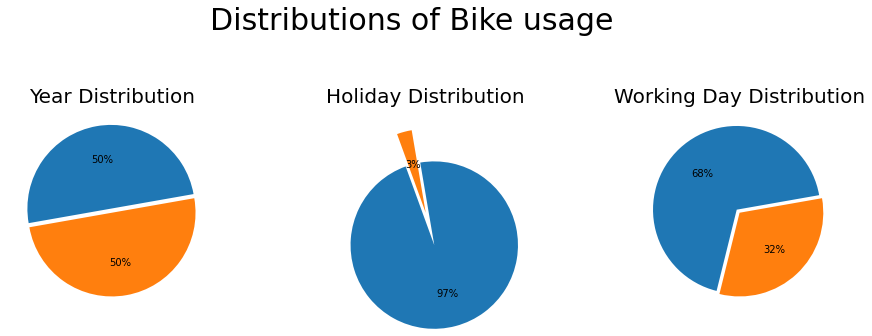

In [15]:
# visualising numerical variables

# create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 6), facecolor='w')

# Year distribution
axs[0].pie(df['year'].value_counts(normalize=True), explode=[0.05, 0], autopct="%1.0f%%", startangle=10)
axs[0].set_title('Year Distribution', fontsize=20)

# Holiday distribution
axs[1].pie(df['holiday'].value_counts(normalize=True), explode=[0.4, 0], autopct="%1.0f%%", startangle=110)
axs[1].set_title('Holiday Distribution', fontsize=20)

# Working Day distribution
axs[2].pie(df['workingday'].value_counts(normalize=True), explode=[0.05, 0], autopct="%1.0f%%", startangle=10)
axs[2].set_title('Working Day Distribution', fontsize=20)

# Adjust layout
plt.subplots_adjust(wspace=0.5)

# Display the plot
plt.suptitle('Distributions of Bike usage', fontsize=30)
plt.show()

In [16]:
# After analyzing the three pie charts, we can conclude the following:

# year exhibits a nearly equal distribution of daily bike usage records, with approximately 50% for each year.
# notable disparity in the number of records between holidays and non-holidays, indicating higher bike usage on non-holiday days.
# workingday shows a similar trend, with a higher number of records on working days compared to non-working days.

1    463
2    246
3     21
Name: weathersit, dtype: int64 

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64 

sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: weekday, dtype: int64 

jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: month, dtype: int64


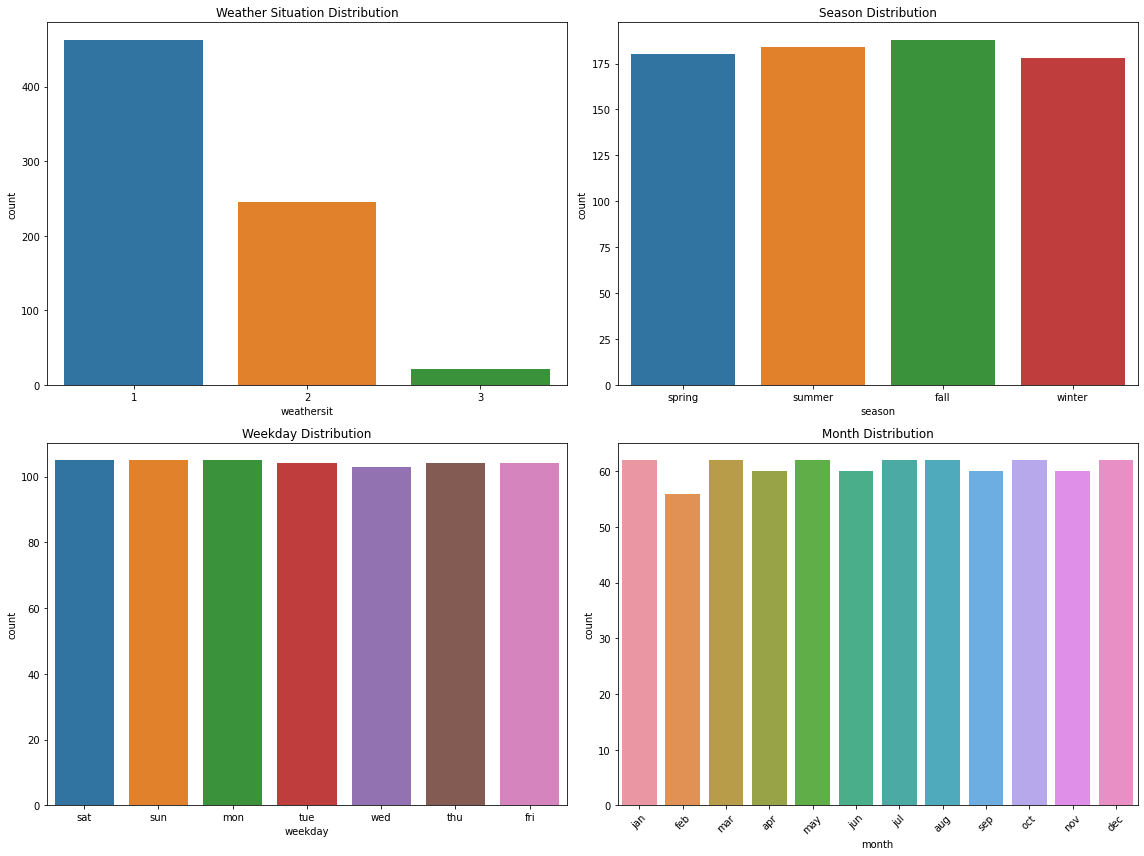

In [17]:
# visualising categorical variables

# create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12), facecolor='w')

# Weather Situation distribution
sns.countplot(data=df, x='weathersit', ax=axs[0, 0])
axs[0, 0].set_title('Weather Situation Distribution')
print(df['weathersit'].value_counts(),'\n')

# Season distribution
sns.countplot(data=df, x='season', ax=axs[0, 1])
axs[0, 1].set_title('Season Distribution')
print(df['season'].value_counts(),'\n')

# Weekday distribution
sns.countplot(data=df, x='weekday', ax=axs[1, 0])
axs[1, 0].set_title('Weekday Distribution')
print(df['weekday'].value_counts(),'\n')

# Month distribution
sns.countplot(data=df, x='month', ax=axs[1, 1])
axs[1, 1].set_title('Month Distribution')
axs[1, 1].tick_params(axis='x', rotation=45)
print(df['month'].value_counts())

plt.tight_layout()
plt.show()

In [18]:
# HAfter analyzing the plots, we can conclude the following:

# Bikes are used more when the weather situation is Clear or Partly cloudy.
# The remaining variables ('season', 'weekday', 'month') show very similar values, indicating that bike usage is relatively consistent across different seasons, weekdays, and months.

### Bivariate Analysis

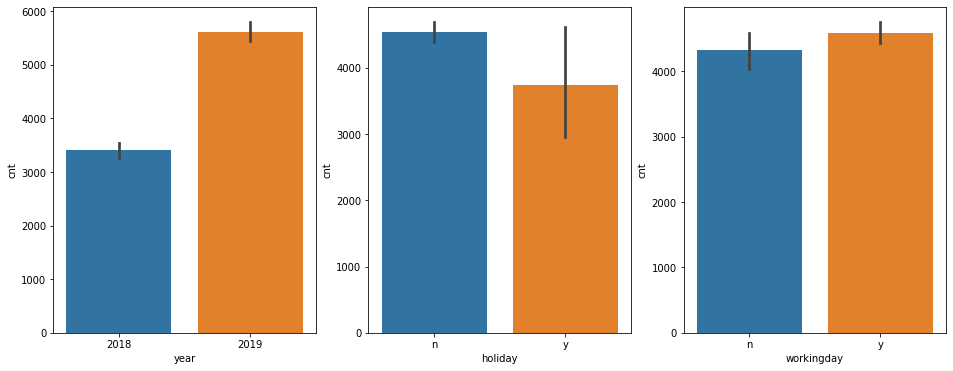

In [19]:
# visualising numerical variables vs 'cnt'

# create a figure and subplots
plt.figure(figsize=[16, 6])

# bike rental count each year (2018, 2019)
plt.subplot(1, 3, 1)
sns.barplot(x='year', y='cnt', data=df)

# bike rental count on holiday vs ordinary day
plt.subplot(1, 3, 2)
sns.barplot(x='holiday', y='cnt', data=df)

# bike rental count on workdays vs weekends
plt.subplot(1, 3, 3)
sns.barplot(x='workingday', y='cnt', data=df)

plt.show()

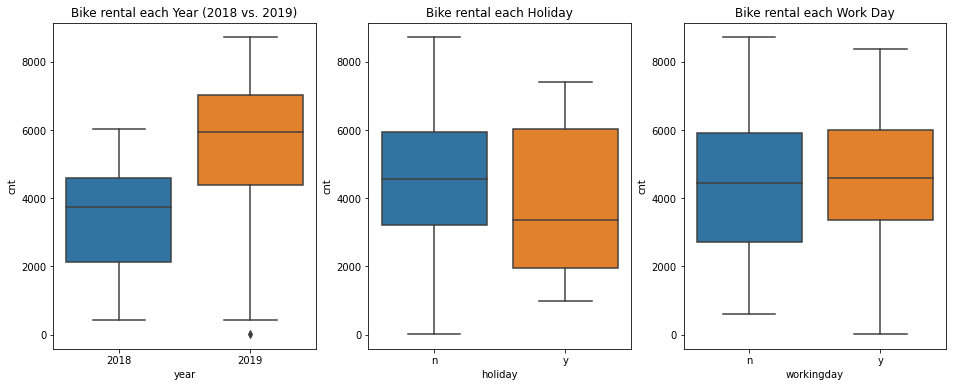

In [20]:
# visualising categorical variables vs 'cnt'

# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(16, 6), facecolor='w')

# bike rental each year
sns.boxplot(x='year', y='cnt', data=df, ax=axs[0])
axs[0].set_title('Bike rental each Year (2018 vs. 2019)')

# bike rental each holiday
sns.boxplot(x='holiday', y='cnt', data=df, ax=axs[1])
axs[1].set_title('Bike rental each Holiday')

# bike rental each workday
sns.boxplot(x='workingday', y='cnt', data=df, ax=axs[2])
axs[2].set_title('Bike rental each Work Day')

plt.show()

In [21]:
# create function calculates the percentage of the total count of bike rentals (cnt) for each variable in a category

# df: dataframe
# categorical_var: the category that its variables need to be calculate
# numerical_var: based on the total count of bike rentals 'cnt"

def calculate_percentage(df, categorical_var, numerical_var='cnt'):
    # Step 1: Group your data by the categorical variable
    grouped_data = df.groupby(categorical_var)
    
    # Step 2: Calculate the total count of the numerical variable across all categories
    total_count = df[numerical_var].sum()
    
    # Step 3: For each category, calculate the count of the numerical variable
    counts_by_category = grouped_data[numerical_var].sum()
    
    # Step 4: Calculate the percentage of the numerical variable for each category
    percentage_by_category = (counts_by_category / total_count) * 100
    percentage_by_category = percentage_by_category.round(2)
    
    return percentage_by_category

In [22]:
# percentage of bike rentals each year
per_hol = calculate_percentage(df, 'year')
print("Percentage of bike rentals for each year:")
print(per_hol)

# percentage of bike rentals on holidays
per_hol = calculate_percentage(df, 'holiday')
print("\nPercentage of bike rentals on holiday:")
print(per_hol)

# percentage of bike rentals on workdays
per_wd = calculate_percentage(df, 'workingday')
print("\nPercentage of bike rentals on working day:")
print(per_wd)

Percentage of bike rentals for each year:
year
2018    37.77
2019    62.23
Name: cnt, dtype: float64

Percentage of bike rentals on holiday:
holiday
n    97.62
y     2.38
Name: cnt, dtype: float64

Percentage of bike rentals on working day:
workingday
n    30.4
y    69.6
Name: cnt, dtype: float64


Year: About 62% of bike rentals in 2019, which is doubled since 2018.

Holiday: Almost 97.6% of bike rentals occurred on non-holiday days, indicating a clear bias in the data. This suggests that 'holiday' may not be a good predictor for the dependent variable.

Workingday: Around 69% of bike rentals occurred on 'workingday', with a median close to 5000 rentals over the two-year period. This suggests that 'workingday' could be a valuable predictor for the dependent variable.

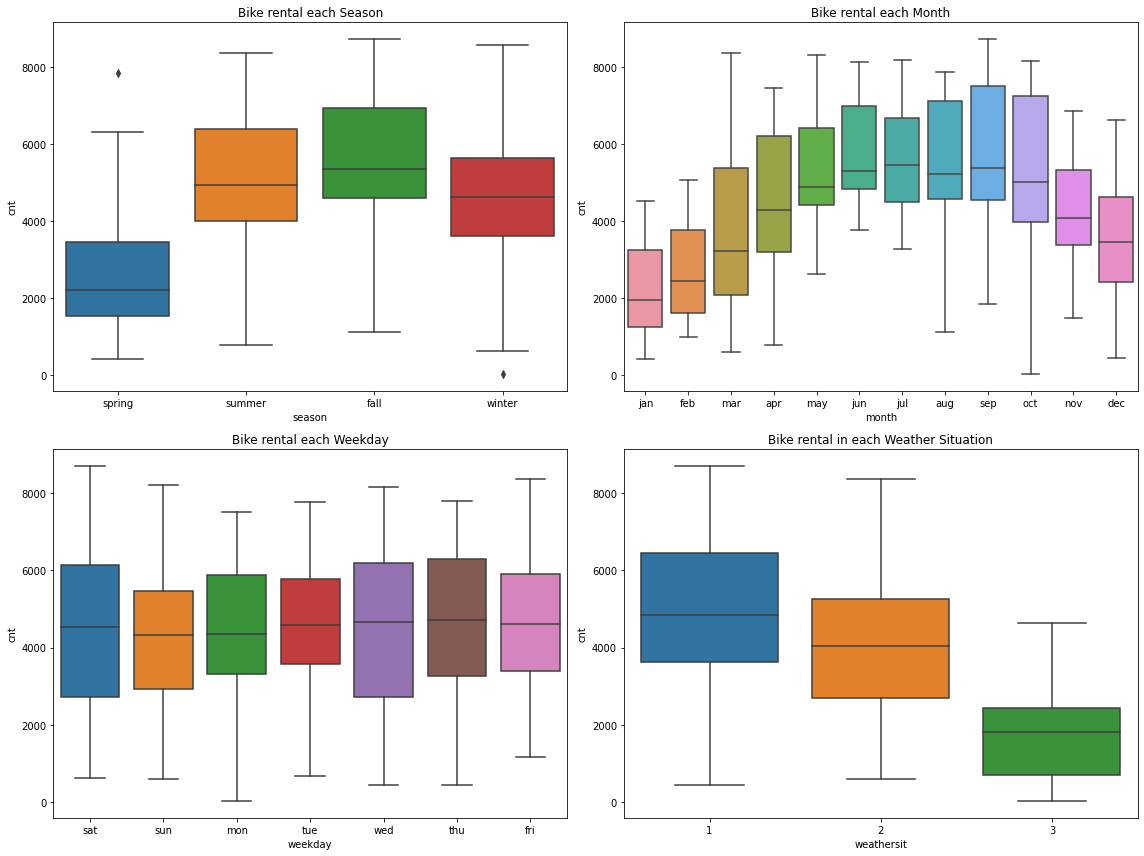

In [23]:
# visualising categorical variables vs 'cnt'

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12), facecolor='w')

# bike rental each season
sns.boxplot(x='season', y='cnt', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Bike rental each Season')

# bike rental each month
sns.boxplot(x='month', y='cnt', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Bike rental each Month')

# bike rental each weekday
sns.boxplot(x='weekday', y='cnt', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Bike rental each Weekday')

# bike rental in each weather situation
sns.boxplot(x='weathersit', y='cnt', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Bike rental in each Weather Situation')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
# percentage of bike rentals each season
per_season = calculate_percentage(df, 'season')
print("Percentage of bike rentals each season:")
print(per_season)

# percentage of bike rentals each month
per_mnth = calculate_percentage(df, 'month')
print("\nPercentage of bike rentals each month:")
print(per_mnth)

# percentage of bike rentals each weekdays
per_week = calculate_percentage(df, 'weekday')
print("\nPercentage of bike rentals each weekdays:")
print(per_week)

# percentage of bike rentals in different weather situations
per_weather = calculate_percentage(df, 'weathersit')
print("\nPercentage of bike rentals in different weather situations:")
print(per_weather)

Percentage of bike rentals each season:
season
fall      32.24
spring    14.27
summer    27.91
winter    25.57
Name: cnt, dtype: float64

Percentage of bike rentals each month:
month
apr     8.18
aug    10.67
dec     6.41
feb     4.54
jan     4.10
jul    10.48
jun    10.52
mar     6.96
may    10.08
nov     7.74
oct     9.80
sep    10.51
Name: cnt, dtype: float64

Percentage of bike rentals each weekdays:
weekday
fri    14.82
mon    13.84
sat    14.52
sun    13.49
thu    14.75
tue    14.25
wed    14.32
Name: cnt, dtype: float64

Percentage of bike rentals in different weather situations:
weathersit
1    68.61
2    30.24
3     1.15
Name: cnt, dtype: float64


Season: Approximately 32% of bike rentals occurred in Fall, with a median of over 5000 rentals over the two-year period. This was followed by Summer and Winter, each accounting for 27% and 25% of total rentals, respectively. This suggests that 'season' could be a valuable predictor for the dependent variable.

Month: About 10% of bike rentals occurred from May to September, with a median of over 4000 rentals per month. This indicates that 'month' exhibits some trend for rentals and may serve as a good predictor for the dependent variable.

Weekday:Approximately 13.5% to 14.8% of total bookings occurring on each day of the week. The median number of bookings remains consistent between 4000 to 5000 across all weekdays. Therefore, 'weekday' may have some influence on the predictor, but its significance needs further exploration by the model.

Weather Situation: Approximately 68% of bike rentals occurred during Clear weather, with a median close to 5000 rentals over the two-year period. This was followed by Misty and Cloudy weather with 30% of total rentals. This suggests that 'weathersit' does show some trend towards bike rentals and could be a valuable predictor for the dependent variable.

In [25]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,n,sat,n,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,n,sun,n,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,n,mon,y,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,n,tue,y,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,n,wed,y,1,9.305237,11.46350,43.6957,12.522300,1600


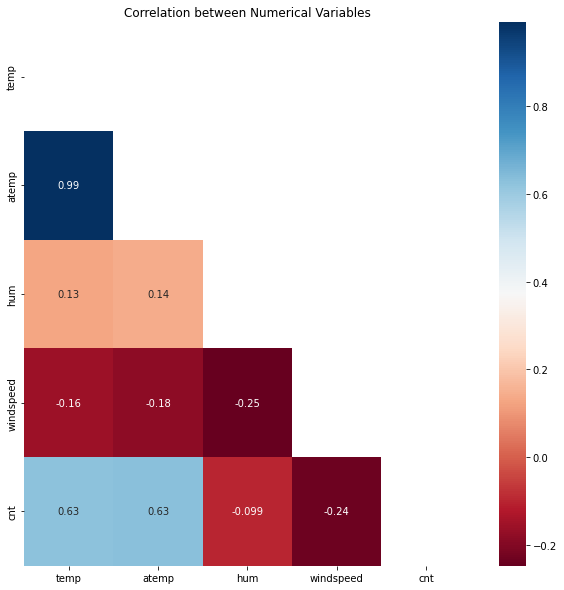

In [26]:
# Set the figure size
plt.figure(figsize=(10, 10))

# Select numerical variables and calculate correlation matrix
selected_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlation_matrix = df[selected_columns].corr()

# Create a mask for the upper triangle of the correlation matrix
matrix_mask = np.triu(correlation_matrix)

# Create the heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", mask=matrix_mask)

# Add title
plt.title("Correlation between Numerical Variables")

# Display the heatmap
plt.show()

# Data Preparation

### Create Dummy Variables

In [27]:
df_n = pd.get_dummies(df, drop_first=True)
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   weathersit     730 non-null    int64  
 1   temp           730 non-null    float64
 2   atemp          730 non-null    float64
 3   hum            730 non-null    float64
 4   windspeed      730 non-null    float64
 5   cnt            730 non-null    int64  
 6   season_spring  730 non-null    uint8  
 7   season_summer  730 non-null    uint8  
 8   season_winter  730 non-null    uint8  
 9   year_2019      730 non-null    uint8  
 10  month_aug      730 non-null    uint8  
 11  month_dec      730 non-null    uint8  
 12  month_feb      730 non-null    uint8  
 13  month_jan      730 non-null    uint8  
 14  month_jul      730 non-null    uint8  
 15  month_jun      730 non-null    uint8  
 16  month_mar      730 non-null    uint8  
 17  month_may      730 non-null    uint8  
 18  month_nov 

In [28]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,n,sat,n,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,n,sun,n,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,n,mon,y,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,n,tue,y,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,n,wed,y,1,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
df_n.head()

,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,year_2019,...,month_oct,month_sep,holiday_y,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_y
0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [30]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   weathersit     730 non-null    int64  
 1   temp           730 non-null    float64
 2   atemp          730 non-null    float64
 3   hum            730 non-null    float64
 4   windspeed      730 non-null    float64
 5   cnt            730 non-null    int64  
 6   season_spring  730 non-null    uint8  
 7   season_summer  730 non-null    uint8  
 8   season_winter  730 non-null    uint8  
 9   year_2019      730 non-null    uint8  
 10  month_aug      730 non-null    uint8  
 11  month_dec      730 non-null    uint8  
 12  month_feb      730 non-null    uint8  
 13  month_jan      730 non-null    uint8  
 14  month_jul      730 non-null    uint8  
 15  month_jun      730 non-null    uint8  
 16  month_mar      730 non-null    uint8  
 17  month_may      730 non-null    uint8  
 18  month_nov 

In [31]:
df_n.columns

Index(['weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'year_2019',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'holiday_y', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'workingday_y'],
      dtype='object')

## Splitting the Data into Training and Testing Sets

In [32]:
np.random.seed(0)
df_train, df_test = train_test_split(df_n, train_size = 0.7, random_state = 100)

In [33]:
df_train.shape

(510, 29)

In [34]:
df_test.shape

(220, 29)

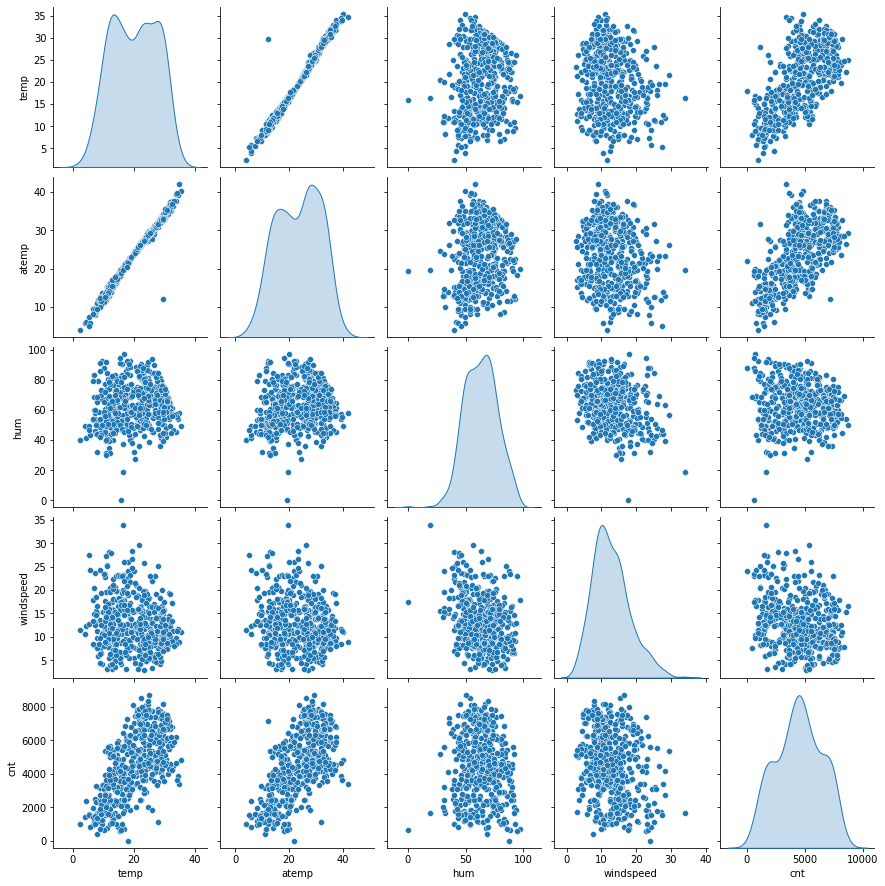

In [35]:
# pairplot of the numeric variables ('temp', 'atemp', 'hum', 'windspeed','cnt')
# Select numerical variables
df_num = df_train[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

# Create pairplot with KDEs
sns.pairplot(df_num, diag_kind='kde')

# Show the plot
plt.show()

In [36]:
# Calculate the correlation matrix
correlation_matrix = df_num.corr()

# Extract the correlation coefficients between 'temp', 'atemp', and 'cnt'
temp_corr = correlation_matrix.loc['temp', 'cnt']
atemp_corr = correlation_matrix.loc['atemp', 'cnt']

# Print the correlation coefficients
print("Correlation between 'temp' and 'cnt':", temp_corr)
print("Correlation between 'atemp' and 'cnt':", atemp_corr)

Correlation between 'temp' and 'cnt': 0.6450483314857681
Correlation between 'atemp' and 'cnt': 0.64794437627751


The above correlation suggests that changes in temperature (both actual and perceived) are associated with changes in bike rentals, which means there is a linear relationship between 'temp', 'atemp', and 'cnt'.

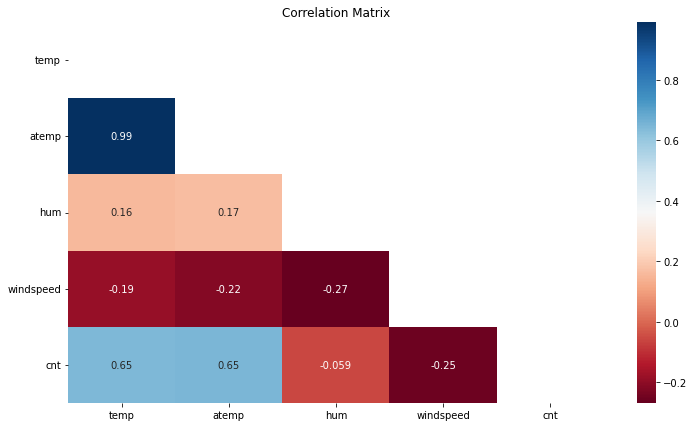

In [37]:
# Set the figure size
plt.figure(figsize=(12, 7))

# Calculate the correlation matrix
correlation_matrix = df_num.corr()

matrix_mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create heatmap with annotations for the lower triangle
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", mask=matrix_mask)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Add title
plt.title("Correlation Matrix")

# Display the heatmap
plt.show()

## Scaling

In [38]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

In [39]:
df_train.head()

,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,year_2019,...,month_oct,month_sep,holiday_y,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_y
576,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
426,2,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
728,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
482,2,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
111,2,13.803347,16.0977,72.9583,14.707907,1683,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
df_train.columns

Index(['weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'year_2019',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'holiday_y', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'workingday_y'],
      dtype='object')

In [41]:
# Define numerical variables to be scaled
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Apply MinMaxScaler to numerical variables
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [42]:
df_train.head()

,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,year_2019,...,month_oct,month_sep,holiday_y,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_y
576,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
426,2,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
728,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
482,2,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
111,2,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
df_train.describe()

,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,year_2019,...,month_oct,month_sep,holiday_y,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_y
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,1.403922,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,...,0.084314,0.080392,0.025490,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.676471
std,0.547888,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,...,0.278131,0.272166,0.157763,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.468282
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Linear Model

In [44]:
y_train = df_train.pop('cnt')
x_train = df_train
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [45]:
# Initialize the linear regression model
lm = LinearRegression()

# Fit the model to the training data
lm.fit(x_train, y_train)

# Initialize RFE with the linear regression model and specify the number of features to select
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit RFE to the training data
rfe.fit(x_train, y_train)

# Get the selected features
selected_features = x_train.columns[rfe.support_]

In [46]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('year_2019', True, 1),
 ('month_aug', False, 5),
 ('month_dec', False, 3),
 ('month_feb', False, 14),
 ('month_jan', True, 1),
 ('month_jul', True, 1),
 ('month_jun', False, 13),
 ('month_mar', False, 6),
 ('month_may', False, 4),
 ('month_nov', False, 2),
 ('month_oct', False, 12),
 ('month_sep', True, 1),
 ('holiday_y', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 7),
 ('weekday_thu', False, 10),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 11),
 ('workingday_y', True, 1)]

In [47]:
# Selecting the selected variables via RFE in col list
col = x_train.columns[rfe.support_]
col

Index(['weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'year_2019', 'month_jan', 'month_jul',
       'month_sep', 'holiday_y', 'weekday_sat', 'workingday_y'],
      dtype='object')

In [48]:
x_train.columns[~rfe.support_]

Index(['month_aug', 'month_dec', 'month_feb', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

## Building Linear Model using STATS MODEL

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [50]:
def calculateVIF(df):
    # Create an empty DataFrame to store the results
    vif = pd.DataFrame()
    
    # Add a column 'Features' and assign it the column names of the input DataFrame
    vif['Features'] = df.columns
    
    # Calculate the VIF for each feature
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    # Round the VIF values to two decimal places
    vif['VIF'] = vif['VIF'].round(2)
    
    # Sort the DataFrame based on VIF values in descending order
    vif = vif.sort_values(by="VIF", ascending=False)
    
    return vif


### Model 1

In [51]:
# train models with a reduced set of features that are likely to be more relevant for prediction
x_train_rfe = x_train[col]
calculateVIF(x_train_rfe)

,Features,VIF
1,temp,375.34
2,atemp,367.93
3,hum,34.49
0,weathersit,12.70
14,workingday_y,5.36
4,windspeed,5.09
5,season_spring,4.31
7,season_winter,3.39
6,season_summer,2.90
8,year_2019,2.09


In [52]:
# Add a constant term to the feature matrix
x_train_lm1 = sm.add_constant(x_train_rfe)

In [53]:
# Create a first fitted model using Ordinary Least Squares (OLS)
lr1 = sm.OLS(y_train, x_train_lm1).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.0
Date:                Thu, 21 Mar 2024   Prob (F-statistic):          5.00e-186
Time:                        00:01:55   Log-Likelihood:                 507.53
No. Observations:                 510   AIC:                            -983.1
Df Residuals:                     494   BIC:                            -915.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3342      0.036      9.313      0.000       0.264       0.405
weathersit       -0.0787      0.010     -8.268      0.000      -0.097      -0.060
temp              0.4603      0.136      3.387      0.001       0.193       0.727
atemp             0.0491      0.139      0.353      0.724      -0.224       0.322
hum              -0.1465      0.038     -3.835      0.000      -0.222      -0.071
windspeed        -0.1945      0.027     -7.331      0.000      -0.247      -0.142
season_spring    -0.0523      0.021     -2.446      0.015      -0.094      -0.010
season_summer     0.0515      0.016      3.318      0.001       0.021       0.082
season_winter     0.0879      0.018      4.883      0.000       0.053       0.123
year_2019         0.2325      0.008     28.390      0.000       0.216       0.249
month_jan        -0.0304      0.018     -1.712      0.088      -0.065       0.004
month_jul        -0.0574      0.019     -3.097      0.002      -0.094      -0.021
month_sep         0.0800      0.017      4.738      0.000       0.047       0.113
holiday_y        -0.0573      0.028     -2.081      0.038      -0.111      -0.003
weekday_sat       0.0531      0.015      3.578      0.000       0.024       0.082
workingday_y      0.0430      0.012      3.643      0.000       0.020       0.066
==============================================================================
Omnibus:                       71.132   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.337
Skew:                          -0.693   Prob(JB):                     7.69e-42
Kurtosis:                       5.644   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 2

Removing the variable 'atemp' based on its very high 'VIF' value

In [54]:
x_train_n = x_train_rfe.drop(columns=['atemp'])
calculateVIF(x_train_n)

,Features,VIF
2,hum,34.40
1,temp,15.52
0,weathersit,12.67
13,workingday_y,5.36
3,windspeed,4.86
4,season_spring,4.19
6,season_winter,3.22
5,season_summer,2.76
7,year_2019,2.09
12,weekday_sat,1.99


In [55]:
# Create a second fitted model without the 'atemp' variable
x_train_lm2 = sm.add_constant(x_train_n)
lr2 = sm.OLS(y_train, x_train_lm2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.7
Date:                Thu, 21 Mar 2024   Prob (F-statistic):          3.82e-187
Time:                        00:01:55   Log-Likelihood:                 507.46
No. Observations:                 510   AIC:                            -984.9
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3340      0.036      9.317      0.000       0.264       0.404
weathersit       -0.0789      0.009     -8.306      0.000      -0.098      -0.060
temp              0.5066      0.035     14.418      0.000       0.438       0.576
hum              -0.1458      0.038     -3.826      0.000      -0.221      -0.071
windspeed        -0.1964      0.026     -7.557      0.000      -0.247      -0.145
season_spring    -0.0512      0.021     -2.423      0.016      -0.093      -0.010
season_summer     0.0526      0.015      3.467      0.001       0.023       0.082
season_winter     0.0891      0.018      5.047      0.000       0.054       0.124
year_2019         0.2325      0.008     28.413      0.000       0.216       0.249
month_jan        -0.0306      0.018     -1.725      0.085      -0.065       0.004
month_jul        -0.0569      0.018     -3.083      0.002      -0.093      -0.021
month_sep         0.0804      0.017      4.775      0.000       0.047       0.114
holiday_y        -0.0577      0.028     -2.098      0.036      -0.112      -0.004
weekday_sat       0.0531      0.015      3.580      0.000       0.024       0.082
workingday_y      0.0430      0.012      3.645      0.000       0.020       0.066
==============================================================================
Omnibus:                       70.508   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.304
Skew:                          -0.688   Prob(JB):                     2.13e-41
Kurtosis:                       5.631   Cond. No.                         28.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 3

Removing the variable 'hum' based on its very high 'VIF' value

In [56]:
# Remove the 'hum' column from the feature matrix X_train_lm2
x_train_n = x_train_n.drop(columns=['hum'])
calculateVIF(x_train_n)

,Features,VIF
1,temp,8.13
0,weathersit,7.04
12,workingday_y,5.35
2,windspeed,4.70
3,season_spring,3.33
4,season_summer,2.45
5,season_winter,2.27
6,year_2019,2.07
11,weekday_sat,1.99
7,month_jan,1.63


In [57]:
# Create a third fitted model without the 'hum' variable
x_train_lm3 = sm.add_constant(x_train_n)
lr3 = sm.OLS(y_train, x_train_lm3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.6
Date:                Thu, 21 Mar 2024   Prob (F-statistic):          3.52e-185
Time:                        00:01:55   Log-Likelihood:                 500.03
No. Observations:                 510   AIC:                            -972.1
Df Residuals:                     496   BIC:                            -912.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2830      0.034      8.390      0.000       0.217       0.349
weathersit       -0.1012      0.008    -13.324      0.000      -0.116      -0.086
temp              0.4717      0.034     13.714      0.000       0.404       0.539
windspeed        -0.1678      0.025     -6.652      0.000      -0.217      -0.118
season_spring    -0.0596      0.021     -2.798      0.005      -0.101      -0.018
season_summer     0.0466      0.015      3.050      0.002       0.017       0.077
season_winter     0.0753      0.018      4.299      0.000       0.041       0.110
year_2019         0.2361      0.008     28.654      0.000       0.220       0.252
month_jan        -0.0352      0.018     -1.961      0.050      -0.070    7.54e-05
month_jul        -0.0520      0.019     -2.786      0.006      -0.089      -0.015
month_sep         0.0749      0.017      4.405      0.000       0.041       0.108
holiday_y        -0.0555      0.028     -1.991      0.047      -0.110      -0.001
weekday_sat       0.0576      0.015      3.841      0.000       0.028       0.087
workingday_y      0.0458      0.012      3.842      0.000       0.022       0.069
==============================================================================
Omnibus:                       70.654   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.236
Skew:                          -0.685   Prob(JB):                     4.91e-42
Kurtosis:                       5.660   Cond. No.                         26.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 4

All of VIF value are now under 5, except from 'temp'.
Removing the variable 'month_jan' because its P-value is 0.05 hence for safety

In [58]:
# Remove the 'month_jan' column from the feature matrix X_train_lm3
x_train_n = x_train_n.drop(columns=['month_jan'])
calculateVIF(x_train_n)

,Features,VIF
1,temp,7.96
0,weathersit,6.96
11,workingday_y,5.32
2,windspeed,4.66
3,season_spring,2.81
4,season_summer,2.45
5,season_winter,2.27
6,year_2019,2.06
10,weekday_sat,1.98
7,month_jul,1.58


In [59]:
# Create a fourth fitted model without the 'month_jan' variable
x_train_lm4 = sm.add_constant(x_train_n)
lr4 = sm.OLS(y_train, x_train_lm4).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 21 Mar 2024   Prob (F-statistic):          1.60e-185
Time:                        00:01:55   Log-Likelihood:                 498.06
No. Observations:                 510   AIC:                            -970.1
Df Residuals:                     497   BIC:                            -915.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2687      0.033      8.136      0.000       0.204       0.334
weathersit       -0.1016      0.008    -13.340      0.000      -0.117      -0.087
temp              0.4891      0.033     14.675      0.000       0.424       0.555
windspeed        -0.1611      0.025     -6.427      0.000      -0.210      -0.112
season_spring    -0.0647      0.021     -3.049      0.002      -0.106      -0.023
season_summer     0.0494      0.015      3.238      0.001       0.019       0.079
season_winter     0.0809      0.017      4.673      0.000       0.047       0.115
year_2019         0.2354      0.008     28.515      0.000       0.219       0.252
month_jul        -0.0535      0.019     -2.860      0.004      -0.090      -0.017
month_sep         0.0753      0.017      4.418      0.000       0.042       0.109
holiday_y        -0.0564      0.028     -2.016      0.044      -0.111      -0.001
weekday_sat       0.0572      0.015      3.806      0.000       0.028       0.087
workingday_y      0.0456      0.012      3.814      0.000       0.022       0.069
==============================================================================
Omnibus:                       70.214   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.946
Skew:                          -0.680   Prob(JB):                     9.35e-42
Kurtosis:                       5.653   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 5

Removing the variable 'holiday_y' because its P-value is 0.044 which is close to 0.05 hence for safety

In [60]:
# Remove the 'holiday_y' column from the feature matrix X_train_lm4
x_train_n = x_train_n.drop(columns=['holiday_y'])
calculateVIF(x_train_n)

,Features,VIF
1,temp,7.73
0,weathersit,6.96
10,workingday_y,4.76
2,windspeed,4.65
3,season_spring,2.71
4,season_summer,2.43
5,season_winter,2.21
6,year_2019,2.06
9,weekday_sat,1.85
7,month_jul,1.58


In [61]:
# Create a fifth fitted model without the 'month_jan' variable
x_train_lm5 = sm.add_constant(x_train_n)
lr5 = sm.OLS(y_train, x_train_lm5).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.6
Date:                Thu, 21 Mar 2024   Prob (F-statistic):          7.80e-186
Time:                        00:01:56   Log-Likelihood:                 495.99
No. Observations:                 510   AIC:                            -968.0
Df Residuals:                     498   BIC:                            -917.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2599      0.033      7.915      0.000       0.195       0.324
weathersit       -0.1010      0.008    -13.237      0.000      -0.116      -0.086
temp              0.4896      0.033     14.644      0.000       0.424       0.555
windspeed        -0.1620      0.025     -6.442      0.000      -0.211      -0.113
season_spring    -0.0656      0.021     -3.083      0.002      -0.107      -0.024
season_summer     0.0498      0.015      3.253      0.001       0.020       0.080
season_winter     0.0802      0.017      4.616      0.000       0.046       0.114
year_2019         0.2355      0.008     28.449      0.000       0.219       0.252
month_jul        -0.0524      0.019     -2.797      0.005      -0.089      -0.016
month_sep         0.0734      0.017      4.299      0.000       0.040       0.107
weekday_sat       0.0657      0.014      4.534      0.000       0.037       0.094
workingday_y      0.0540      0.011      4.797      0.000       0.032       0.076
==============================================================================
Omnibus:                       75.429   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.154
Skew:                          -0.719   Prob(JB):                     2.32e-46
Kurtosis:                       5.797   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Evaluating a linear regression model (model 5) based on its multicollinearity, significance of predictor variables (p-values), and overall model significance (F-statistics). Here's a summary of your evaluation:

- Multicollinearity: There is low multicollinearity between the predictors in the model, indicates that the predictor variables are not highly correlated with each other, which is desirable for regression analysis.

- Significance of Predictors (p-values): P-values for all predictors are significant. This suggests that each predictor is significantly associated with the target variable, given the other predictors in the model.

- Overall Model Significance (F-statistics): The F-statistics value of 226.6 is greater than 1, and the associated p-value is very close to zero (7.80e-186), indicating that the overall model is significant. This suggests that the model as a whole explains a significant amount of the variance in the target variable.

Based on these evaluations, you conclude that model 5 is a good fit for the data and can be considered for further analysis or prediction tasks.

## Residual Analysis

In [62]:
x_train_lm5

,const,weathersit,temp,windspeed,season_spring,season_summer,season_winter,year_2019,month_jul,month_sep,weekday_sat,workingday_y
576,1.0,1,0.815169,0.264686,0,0,0,1,1,0,0,1
426,1.0,2,0.442393,0.255342,1,0,0,1,0,0,1,0
728,1.0,1,0.245101,0.663106,1,0,0,1,0,0,0,0
482,1.0,2,0.395666,0.188475,0,1,0,1,0,0,1,0
111,1.0,2,0.345824,0.380981,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0.863973,0.187140,0,0,0,1,0,0,0,1
53,1.0,1,0.202618,0.111379,1,0,0,0,0,0,0,1
350,1.0,2,0.248216,0.431816,0,0,1,0,0,0,1,0
79,1.0,2,0.462664,0.529881,0,1,0,0,0,0,0,1


In [63]:
y_train_pred = lr5.predict(x_train_lm5)

### Testing the normality of the error terms

Text(0.5, 0, 'Errors')

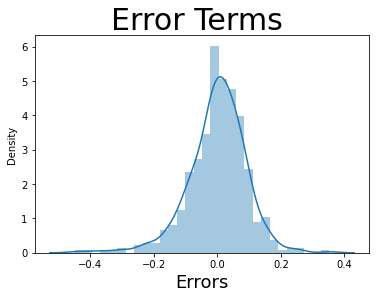

In [64]:
# Create a new figure
error_fig = plt.figure()

# Plot the histogram of the error terms
sns.distplot((y_train - y_train_pred), bins=30)

# Add title and labels
error_fig.suptitle('Error Terms', fontsize=30) 
plt.xlabel('Errors', fontsize=18)

Based on the histogram above, we observe that the residuals exhibit a roughly normal distribution. This suggests that our assumption of normality for linear regression is valid.

### Multicollinearity

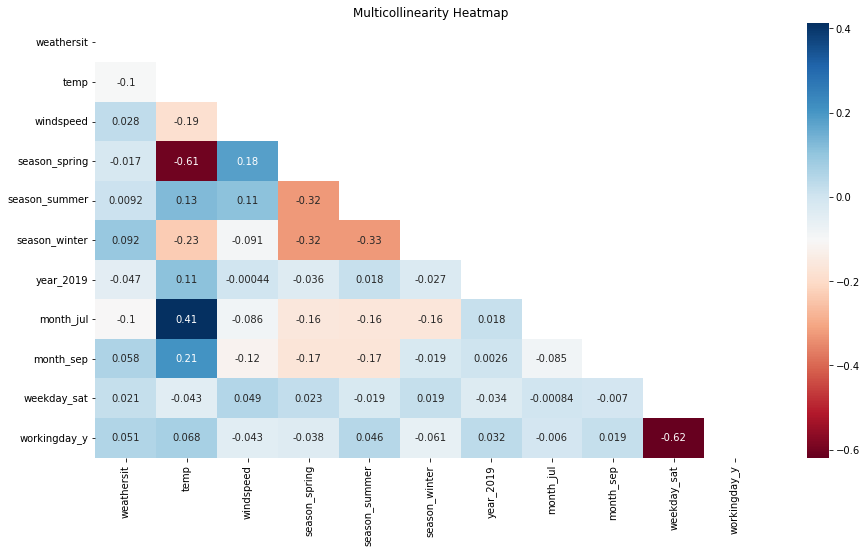

In [65]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Calculate correlation matrix
correlation_matrix = x_train_n.corr()

# Create a mask for the upper triangle of the correlation matrix
matrix_mask = np.triu(correlation_matrix)

# Plot the heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", mask=matrix_mask)

# Add title
plt.title("Multicollinearity Heatmap")

# Display the heatmap
plt.show()

### Linearity

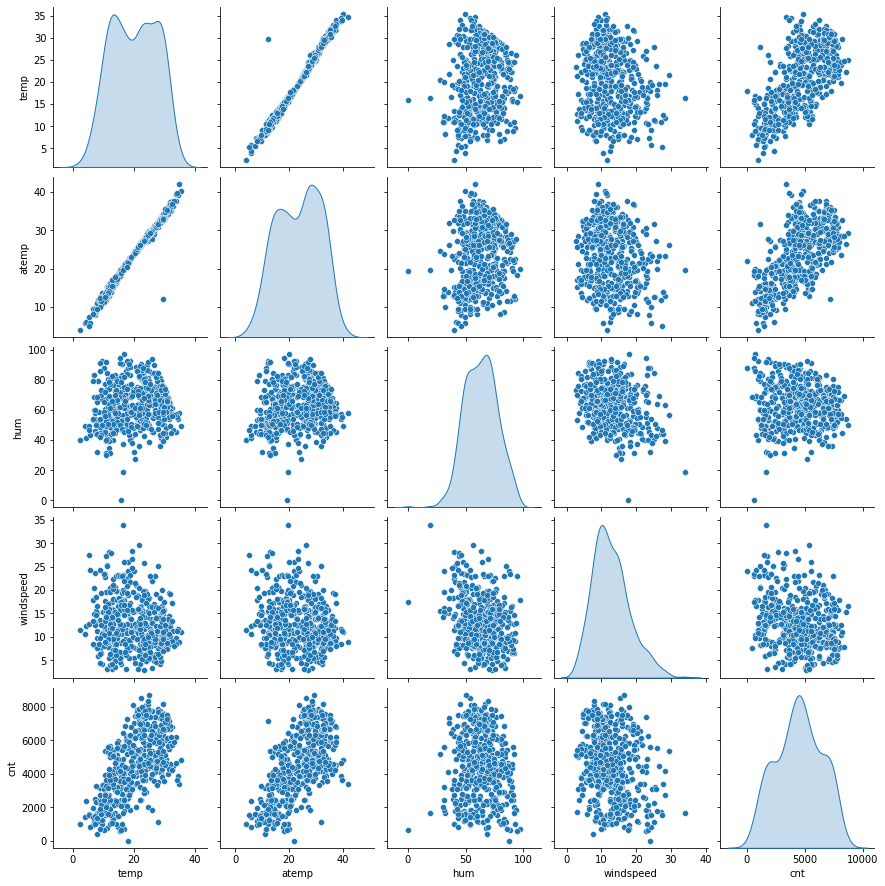

In [66]:
df_n=df_n[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_num, diag_kind='kde')
plt.show()

After examining the pair plot, it's evident that there exists a linear relationship between the 'temp' and 'atemp' variables with the predictor 'cnt'.

# Make Predictions

In [67]:
# Selecting numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Applying scaler.transform to all numeric variables in the test dataset
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,year_2019,...,month_oct,month_sep,holiday_y,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_y
184,2,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
535,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
299,2,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
221,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
152,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [68]:
df_test.describe()

,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,year_2019,...,month_oct,month_sep,holiday_y,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_y
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,1.372727,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.481818,...,0.086364,0.086364,0.036364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.700000
std,0.538204,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.500809,...,0.281541,0.281541,0.187620,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.459303
min,1.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
y_test = df_test.pop('cnt')
x_test = df_test
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   weathersit     220 non-null    int64  
 1   temp           220 non-null    float64
 2   atemp          220 non-null    float64
 3   hum            220 non-null    float64
 4   windspeed      220 non-null    float64
 5   season_spring  220 non-null    uint8  
 6   season_summer  220 non-null    uint8  
 7   season_winter  220 non-null    uint8  
 8   year_2019      220 non-null    uint8  
 9   month_aug      220 non-null    uint8  
 10  month_dec      220 non-null    uint8  
 11  month_feb      220 non-null    uint8  
 12  month_jan      220 non-null    uint8  
 13  month_jul      220 non-null    uint8  
 14  month_jun      220 non-null    uint8  
 15  month_mar      220 non-null    uint8  
 16  month_may      220 non-null    uint8  
 17  month_nov      220 non-null    uint8  
 18  month_oc

In [70]:
# Store the column names of the final model variables
selected_columns = x_train_n.columns

# Select only the final model variables in the test dataframe
x_test_selected = x_test[selected_columns]

# Add a constant variable to the test dataframe
x_test_with_const = sm.add_constant(x_test_selected)

# Print information about the test dataframe
x_test_with_const.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          220 non-null    float64
 1   weathersit     220 non-null    int64  
 2   temp           220 non-null    float64
 3   windspeed      220 non-null    float64
 4   season_spring  220 non-null    uint8  
 5   season_summer  220 non-null    uint8  
 6   season_winter  220 non-null    uint8  
 7   year_2019      220 non-null    uint8  
 8   month_jul      220 non-null    uint8  
 9   month_sep      220 non-null    uint8  
 10  weekday_sat    220 non-null    uint8  
 11  workingday_y   220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(8)
memory usage: 10.3 KB


In [73]:
y_pred = lr5.predict(x_test_with_const)

## Model Evaluation

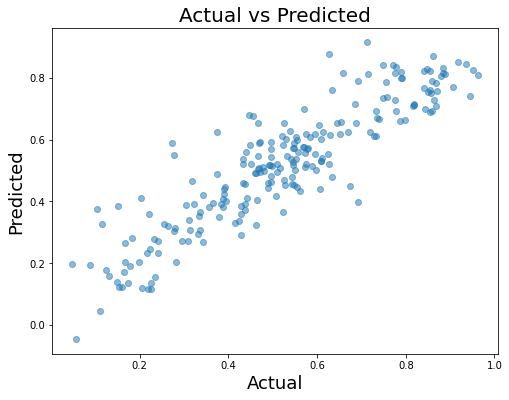

In [74]:
# Create a scatter plot of y_test and y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

plt.title('Actual vs Predicted', fontsize=20)
plt.xlabel('Actual', fontsize=18)
plt.ylabel('Predicted', fontsize=18)
plt.show()


In [75]:
from sklearn.metrics import r2_score

# Calculate the R-squared score
r_squared = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared score:", r_squared)

R-squared score: 0.8046328025738907


In [76]:
x_test.shape

(220, 28)

In [77]:
# Calculate the number of rows (n) in X_test
n = x_test.shape[0]

# Calculate the number of features (p) in X_test
p = x_test.shape[1]

# Calculate the Adjusted R-squared using the formula
adjusted_r2 = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Print the Adjusted R-squared value
print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.7759925851501679


# FINAL

- Train R^2 :0.833
- Test R^2 :0.804
- Adjusted R^2: 0.76

Overall, the model appears to generalize well to unseen data, as evidenced by the relatively high test R-squared score compared to the train R-squared score. 

In [78]:
lr5.params

const            0.259877
weathersit      -0.101049
temp             0.489555
windspeed       -0.161954
season_spring   -0.065587
season_summer    0.049826
season_winter    0.080175
year_2019        0.235527
month_jul       -0.052444
month_sep        0.073434
weekday_sat      0.065651
workingday_y     0.053962
dtype: float64

Based on the coefficients obtained from the final model, the top three predictor variables influencing bike bookings are:

1. Temperature (`temp`): With a coefficient of 0.033, an increase in temperature leads to an increase in bike rental. This suggests that warmer temperatures positively impact bike rentals.

2. Windspeed (`windspeed`): With a coefficient of -0.1620, an increase in the severity of windspeed leads to a decrease in bike rental. This implies that unfavorable wind negatively affect bike rentals.

3. Year 2019 (`year_2019`): With a coefficient of 0.2355, an increase in the year variable leads to an increase in bike rental. This suggests that there has been a positive trend in bike rentals over the years.

Therefore, it is recommended to prioritize these variables when planning strategies to maximize bike bookings. Paying attention to temperature variations, considering windspeed, and monitoring trends over the years can help optimize bike rental operations and attract more customers.